# Pycaret et AutoML

**PyCaret** est une bibliothèque d'**AutoML** (Apprentissage Automatique Automatisé).

L'AutoML vise à **automatiser le processus de construction, de formation et de déploiement de modèles d'apprentissage automatique**, simplifiant ainsi le travail du data scientist et réduisant la nécessité d'une expertise approfondie en la matière.

#### Qu'est-ce que Pycaret?

    PyCaret est une bibliothèque Python conçue pour faciliter le flux de travail de l'apprentissage automatique.
    Elle offre une interface simple et unifiée pour plusieurs tâches d'apprentissage automatique, de la préparation des données à la création de modèles et à l'évaluation des performances.
    PyCaret prend en charge divers types de modèles, notamment la classification, la régression, le regroupement, etc.

Documentation officielle : https://pycaret.readthedocs.io/en/stable/api/classification.html

#### Qu'est-ce que l'AutoML?

    L'AutoML automatise plusieurs étapes du processus d'apprentissage automatique, telles que la sélection de modèles, l'optimisation des hyperparamètres et la validation croisée.
    Cela permet aux praticiens qui ne sont pas des experts en apprentissage automatique de créer rapidement des modèles performants sans avoir besoin d'une expertise approfondie.

#### Utilisation de PyCaret pour l'AutoML

    PyCaret simplifie l'utilisation de l'AutoML en fournissant des fonctions prêtes à l'emploi pour la préparation des données, la création de modèles, l'évaluation des performances, etc.
    Il vous permet de spécifier les tâches que vous souhaitez effectuer et effectue automatiquement les étapes nécessaires en coulisses.

##### Installation de Pycaret

In [3]:
# pip3 install pycaret

##### Import des librairies et packages

In [4]:
# IMPORT DES LIBRAIRIES & PACKAGES
from pycaret.classification import *
import pycaret

##### Afficher la version de Pycaret

In [5]:
print(f"Pycaret version : {pycaret.__version__}")

Pycaret version : 3.2.0


##### Création d'un environnement Pycaret

In [6]:
from pycaret.classification import *
from sklearn import datasets

# Charger l'ensemble de données Iris
iris = datasets.load_iris()

# Spécifier la colonne cible (target) dans l'ensemble de données Iris
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Initialisation l'environnement PyCaret en spécifiant la colonne cible
session = setup(data=iris_df, target='target', normalize=True, train_size=0.7, data_split_stratify=True, fold=5, session_id=0)

,Description,Value
0,Session id,0
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(105, 5)"
6,Transformed test set shape,"(45, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


PyCaret est une bibliothèque open-source en Python conçue pour simplifier le processus de développement de modèles de machine learning. Elle vise à automatiser de nombreuses tâches courantes, telles que la préparation des données, le choix des modèles, l'ajustement des hyperparamètres, l'évaluation des performances et la création de visualisations.

La ligne de code que vous avez fournie ressemble à une étape clé de l'utilisation de PyCaret, où vous initialisez un environnement de PyCaret en utilisant la fonction `setup`. Voici une explication de chaque paramètre dans cette fonction :

- `data=iris_df`: Spécifiez le jeu de données que vous souhaitez utiliser. `iris_df` semble être un DataFrame contenant les données, peut-être le jeu de données Iris.

- `target='target'`: Indique la variable cible (ou étiquette) que vous essayez de prédire. Dans cet exemple, la variable cible est appelée 'target'.

- `normalize=True`: Normalise les données. Cela signifie que les valeurs des caractéristiques seront mises à l'échelle pour avoir une moyenne de zéro et un écart type de un. Cela est souvent utile car certains algorithmes de machine learning peuvent être sensibles aux différentes échelles des caractéristiques.

- `train_size=0.7`: Spécifie la proportion des données à utiliser pour l'ensemble d'entraînement. Dans cet exemple, 70% des données seront utilisées pour l'entraînement.

- `data_split_stratify=True`: Effectue une stratification lors de la division des données en ensembles d'entraînement et de test. La stratification est importante pour maintenir la distribution des classes dans les deux ensembles, ce qui est crucial pour certains problèmes de classification.

- `fold=5`: Indique le nombre de plis à utiliser lors de la validation croisée. Dans cet exemple, la validation croisée sera effectuée avec 5 plis.

- `session_id=0`: Fournit un identifiant de session pour la reproductibilité. En fixant cet identifiant, vous pouvez obtenir les mêmes résultats lors de l'exécution ultérieure du code.

En résumé, l'appel à `setup` dans PyCaret permet de configurer l'environnement de travail, de prétraiter les données, de diviser les données en ensembles d'entraînement et de test, et de définir d'autres paramètres importants pour le développement du modèle. Une fois que l'environnement est configuré, vous pouvez utiliser d'autres fonctionnalités de PyCaret pour explorer, comparer et évaluer différents modèles de machine learning.

##### Affichage des algorithmes

In [7]:
algo = models()
print(algo)

                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr    

L'option "Turbo" de PyCaret inclut les modèles les plus performants et rapides pour une variété de tâches de machine learning. Ces modèles sont choisis en fonction de leur performance générale sur différentes tâches, et PyCaret ajuste automatiquement les hyperparamètres pour améliorer leur performance.

##### Comparer et sélectionner les modèles

In [8]:
from pycaret.classification import compare_models
top_models = compare_models(n_select=3, sort="Accuracy")
print(top_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9714,0.9973,0.9714,0.9726,0.9714,0.9571,0.9578,0.0140
lda,Linear Discriminant Analysis,0.9619,0.9973,0.9619,0.9643,0.9618,0.9429,0.9441,0.0120
dt,Decision Tree Classifier,0.9524,0.9643,0.9524,0.9560,0.9522,0.9286,0.9305,0.0160
ada,Ada Boost Classifier,0.9524,0.9878,0.9524,0.9560,0.9522,0.9286,0.9305,0.0320
lr,Logistic Regression,0.9429,0.9939,0.9429,0.9476,0.9427,0.9143,0.9168,0.4720
nb,Naive Bayes,0.9429,0.9946,0.9429,0.9495,0.9424,0.9143,0.9179,0.0140
rf,Random Forest Classifier,0.9429,0.9830,0.9429,0.9476,0.9427,0.9143,0.9168,0.0760
et,Extra Trees Classifier,0.9429,0.9878,0.9429,0.9476,0.9427,0.9143,0.9168,0.0640
gbc,Gradient Boosting Classifier,0.9333,0.9769,0.9333,0.9369,0.9332,0.9000,0.9019,0.0680
lightgbm,Light Gradient Boosting Machine,0.9238,0.9782,0.9238,0.9282,0.9235,0.8857,0.8882,42.4000


[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001), LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')]


PyCaret utilise une approche de recherche automatisée des hyperparamètres pour ajuster les modèles. Plus précisément, PyCaret utilise une méthode appelée **"Random Grid Search"** pour explorer l'espace des hyperparamètres. L'idée est de définir une grille (ensemble) d'hyperparamètres possibles pour chaque modèle, puis de tirer aléatoirement des combinaisons d'hyperparamètres dans cette grille et d'évaluer les performances du modèle avec ces paramètres.

Voici comment le processus se déroule en général dans PyCaret :

1. **Définition de la grille d'hyperparamètres :** PyCaret pré-définit une grille d'hyperparamètres possible pour chaque modèle. Cette grille est généralement assez étendue pour couvrir un large éventail de valeurs possibles pour chaque hyperparamètre.

2. **Recherche aléatoire :** PyCaret sélectionne aléatoirement des combinaisons d'hyperparamètres à partir de la grille pour chaque modèle. Cela permet d'explorer efficacement l'espace des hyperparamètres sans avoir à tester toutes les combinaisons possibles, ce qui serait souvent trop coûteux en termes de temps de calcul.

3. **Évaluation des performances :** Pour chaque combinaison d'hyperparamètres, PyCaret ajuste le modèle sur un sous-ensemble des données d'entraînement et évalue ses performances sur un ensemble de validation (ou à l'aide de la validation croisée). Les performances du modèle avec ces hyperparamètres sont ensuite enregistrées.

4. **Sélection du meilleur modèle :** À la fin de la recherche, PyCaret sélectionne le modèle avec les hyperparamètres qui ont donné les meilleures performances sur l'ensemble de validation.

Cette approche permet une exploration efficace de l'espace des hyperparamètres sans énumérer toutes les combinaisons possibles. C'est un compromis entre l'exploration complète (grid search) et l'exploration purement aléatoire, ce qui en fait une méthode populaire pour l'optimisation des hyperparamètres.

##### Instanciation du modèle

In [9]:
qda_model = create_model("qda")
print(qda_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9048,0.9864,0.9048,0.9048,0.9048,0.8571,0.8571
Mean,0.9714,0.9973,0.9714,0.9726,0.9714,0.9571,0.9578
Std,0.0381,0.0054,0.0381,0.0376,0.0381,0.0571,0.0568


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


1. **Accuracy (Exactitude)** : Il s'agit du rapport du nombre de prédictions correctes au nombre total d'observations. C'est une mesure générale de la performance du modèle.

2. **AUC (Area Under the ROC Curve)** : L'aire sous la courbe ROC. La courbe ROC (Receiver Operating Characteristic) est un graphique de la sensibilité par rapport à la spécificité du modèle pour différents seuils de classification. Une AUC élevée indique une bonne capacité du modèle à discriminer entre les classes.

3. **Recall (Rappel ou Sensibilité)** : Il s'agit du rapport du nombre de vrais positifs au nombre total d'observations de la classe positive. Cela mesure la capacité du modèle à identifier tous les exemples de la classe positive.

4. **Precision (Précision)** : Il s'agit du rapport du nombre de vrais positifs au nombre total de prédictions positives (vrais positifs + faux positifs). Cela mesure la précision du modèle parmi les exemples qu'il classe comme positifs.

5. **F1-score** : Il s'agit d'une moyenne pondérée de la précision et du rappel. Il est souvent utilisé comme une métrique globale qui tient compte à la fois des faux positifs et des faux négatifs.

6. **Kappa** : Le coefficient Kappa mesure l'accord entre les prédictions du modèle et les classes réelles, ajusté pour le hasard. Il fournit une mesure de la performance qui prend en compte le hasard.

7. **MCC (Matthews correlation coefficient)** : Il mesure la qualité des prédictions du modèle, en prenant en compte les quatre résultats possibles du tableau de confusion (vrais positifs, vrais négatifs, faux positifs, faux négatifs).

8. **Training Time (Temps d'entraînement)** : Le temps nécessaire pour entraîner le modèle sur les données d'entraînement.

9. **Testing Time (Temps de test)** : Le temps nécessaire pour tester le modèle sur les données de test.

Ces scores vous donnent une vue d'ensemble de la performance du modèle "qda" sur les données d'entraînement. Il est important de noter que ces scores sont basés sur les données d'entraînement et ne fournissent pas nécessairement une indication de la performance sur des données nouvelles ou non vues. Vous devez toujours évaluer votre modèle sur un ensemble de test distinct pour obtenir une évaluation plus précise de sa performance réelle.

##### Optimisation des paramètres du modèle

In [10]:
tuned_qda = tune_model(qda_model, optimize="Accuracy")
# Affichage des paramètres du modèle optimisé
print(tuned_qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9048,0.9932,0.9048,0.9048,0.9048,0.8571,0.8571
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9524,0.9864,0.9524,0.9583,0.9521,0.9286,0.9317
Mean,0.9619,0.9959,0.9619,0.9643,0.9618,0.9429,0.9441
Std,0.0356,0.0054,0.0356,0.0351,0.0357,0.0535,0.0531


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


##### Evaluation de l'échantillon test

Dans PyCaret, la fonction predict_model est utilisée pour faire des prédictions sur de nouvelles données à l'aide d'un modèle préalablement entraîné. Cette fonction prend en entrée le modèle entraîné, ainsi que les données sur lesquelles vous souhaitez faire des prédictions. Elle retourne un DataFrame contenant les prédictions du modèle sur les nouvelles données.

In [11]:
predict_model(tuned_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction_label,prediction_score
136,6.3,3.4,5.6,2.4,2,2,1.0000
142,5.8,2.7,5.1,1.9,2,2,0.9995
39,5.1,3.4,1.5,0.2,0,0,1.0000
44,5.1,3.8,1.9,0.4,0,0,1.0000
50,7.0,3.2,4.7,1.4,1,1,1.0000
23,5.1,3.3,1.7,0.5,0,0,1.0000
90,5.5,2.6,4.4,1.2,1,1,0.9785
149,5.9,3.0,5.1,1.8,2,2,0.8512
46,5.1,3.8,1.6,0.2,0,0,1.0000
55,5.7,2.8,4.5,1.3,1,1,0.9882


##### Matrice de Confusion

La fonction `plot_model` avec l'argument `plot='confusion_matrix'` dans PyCaret génère une matrice de confusion étendue qui inclut non seulement les vrais positifs, vrais négatifs, faux positifs et faux négatifs, mais également d'autres métriques de classification telles que la sensibilité, spécificité, précision, etc.

Les 9 cases que vous observez dans la matrice de confusion générée par `plot_model` peuvent inclure les éléments suivants :

1. **True Negatives (TN):** Observations correctement prédites comme négatives.
2. **True Positives (TP):** Observations correctement prédites comme positives.
3. **False Negatives (FN):** Observations réelles positives prédites comme négatives.
4. **False Positives (FP):** Observations réelles négatives prédites comme positives.
5. **Sensitivity (Recall):** Le pourcentage d'observations réelles positives correctement prédites (TP / (TP + FN)).
6. **Specificity:** Le pourcentage d'observations réelles négatives correctement prédites (TN / (TN + FP)).
7. **Precision:** Le pourcentage d'observations prédites comme positives qui sont réellement positives (TP / (TP + FP)).
8. **Negative Predictive Value (NPV):** Le pourcentage d'observations prédites comme négatives qui sont réellement négatives (TN / (TN + FN)).
9. **Accuracy:** Le pourcentage total d'observations correctement prédites ((TP + TN) / Total).

Chaque coin de la matrice représente une métrique spécifique. Vous pouvez vous concentrer sur les parties qui sont les plus pertinentes pour votre problème spécifique. Si vous êtes principalement intéressé par la matrice de confusion standard, les valeurs dans les coins supérieurs gauche et inférieurs droit (True Positives et True Negatives) sont celles que vous recherchez.

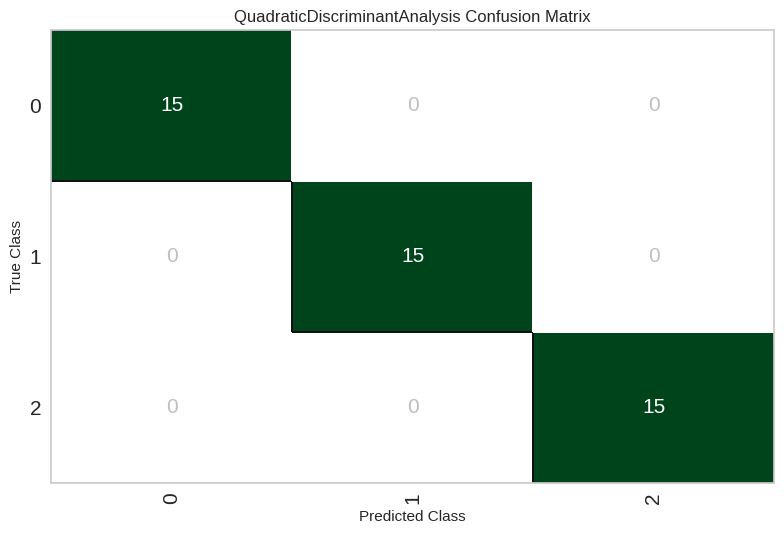

TypeError: confusion_matrix() missing 1 required positional argument: 'y_pred'

In [ ]:
plot_model(qda_model, plot="confusion_matrix")

##### Feature Importance Plot

Attention, Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [18]:
extratree_model = create_model("et")
print(extratree_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9898,0.9524,0.9583,0.9521,0.9286,0.9317
1,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
2,0.9524,0.9932,0.9524,0.9583,0.9521,0.9286,0.9317
3,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
4,0.9048,0.9558,0.9048,0.9048,0.9048,0.8571,0.8571
Mean,0.9429,0.9878,0.9429,0.9476,0.9427,0.9143,0.9168
Std,0.0190,0.0165,0.0190,0.0214,0.0189,0.0286,0.0298


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=0, verbose=0, warm_start=False)


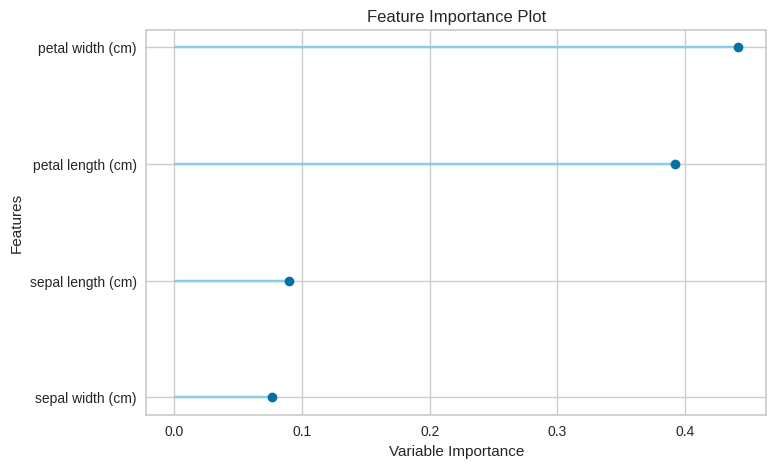

In [17]:
plot_model(extratree_model, plot="feature")

##### Modèle définitif pour le déploiement

La fonction finalize_model dans PyCaret est utilisée pour finaliser un modèle spécifique après l'entraînement. L'idée principale derrière cette fonction est de terminer le processus de modélisation en prenant le modèle entraîné, en le paramétrant avec les meilleures options, et en le prêtant à une utilisation en production ou pour la génération de prédictions sur de nouvelles données.

In [20]:
final_model_qda = finalize_model(qda_model)
print(final_model_qda)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal length (cm)',
                                             'sepal width (cm)',
                                             'petal length (cm)',
                                             'petal width (cm)'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_i...
   

##### Sauvegarde du modèle pour le déploiement

In [21]:
# save_model(final_model, "modele_pour_deploiement")